In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### 

In [3]:
df = pd.read_csv("data/sec_timeline_scaled.csv", low_memory=False)


In [4]:
df.head()

,term,emp_length,annual_inc,dti,delinq_2yrs,fico_avg,inq_last_6mths,open_acc,pub_rec,revol_bal,...,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,loan_status,grade,sub_grade,loan_amnt,int_rate
0,0,0.272727,0.578659,0.034688,1,0.512129,0,0.155556,0,0.544497,...,False,False,False,False,True,0,0.000000,0.117647,0.566905,0.0797
1,1,1.000000,0.626931,0.124273,1,0.053908,1,0.266667,0,0.659641,...,False,False,False,False,True,1,0.666667,0.676471,0.875639,0.2499
2,0,0.000000,0.598518,0.068131,0,0.862534,0,0.200000,0,0.559936,...,False,False,False,False,False,1,0.000000,0.029412,0.790812,0.0707
3,0,0.545455,0.584349,0.028188,0,0.215633,0,0.077778,1,0.598166,...,False,False,False,False,False,0,0.166667,0.205882,0.501238,0.1042
4,0,1.000000,0.594195,0.106040,0,0.080863,0,0.211111,0,0.658498,...,False,False,False,True,False,0,0.166667,0.205882,0.841755,0.0999


In [36]:
# 헬퍼 함수 정의
def min_max_scaling(series):
    """단순 min-max 스케일링: (x - min) / (max - min)"""
    return (series - series.min()) / (series.max() - series.min())

def log_min_max_scaling(series):
    """np.log1p 적용 후 min-max 스케일링"""
    temp = np.log1p(series)
    return (temp - temp.min()) / (temp.max() - temp.min())

def binary_conversion(series):
    """0이 아닌 값은 1, 0은 그대로 0으로 이진화"""
    return (series > 0).astype(int)


# --- 전처리 시작 ---
# term: 36, 60밖에 없으므로 36 -> 0, 60 -> 1로 이진 스케일링
df['term'] = df['term'].apply(lambda x: 0 if x == 36 else 1 if x == 60 else x)

# emp_length: ordinal 변수 -> min-max 스케일링
df['emp_length'] = min_max_scaling(df['emp_length'])

# annual_inc: 로그 후 min-max 스케일링
df['annual_inc'] = log_min_max_scaling(df['annual_inc'])

# dti: 로그 후 min-max 스케일링
df['dti'] = log_min_max_scaling(df['dti'])

# delinq_2yrs: 이진화
df['delinq_2yrs'] = binary_conversion(df['delinq_2yrs'])

# fico_avg: min-max 스케일링
df['fico_avg'] = min_max_scaling(df['fico_avg'])

# inq_last_6mths: 이진화
df['inq_last_6mths'] = binary_conversion(df['inq_last_6mths'])

# open_acc: (ordinal) min-max 스케일링
df['open_acc'] = min_max_scaling(df['open_acc'])

# pub_rec: 이진화
df['pub_rec'] = binary_conversion(df['pub_rec'])

# revol_bal: 로그 후 min-max 스케일링
df['revol_bal'] = log_min_max_scaling(df['revol_bal'])

# revol_util: 로그 후 min-max 스케일링
df['revol_util'] = log_min_max_scaling(df['revol_util'])

# total_acc: (ordinal) min-max 스케일링
df['total_acc'] = min_max_scaling(df['total_acc'])

# acc_now_delinq: 이진화
df['acc_now_delinq'] = binary_conversion(df['acc_now_delinq'])

# tot_cur_bal: 로그 후 min-max 스케일링
df['tot_cur_bal'] = log_min_max_scaling(df['tot_cur_bal'])

# total_rev_hi_lim: min-max 스케일링
df['total_rev_hi_lim'] = min_max_scaling(df['total_rev_hi_lim'])

# avg_cur_bal: min-max 스케일링
df['avg_cur_bal'] = min_max_scaling(df['avg_cur_bal'])

# bc_open_to_buy: 로그 후 min-max 스케일링
df['bc_open_to_buy'] = log_min_max_scaling(df['bc_open_to_buy'])

# bc_util: 로그 후 min-max 스케일링
df['bc_util'] = log_min_max_scaling(df['bc_util'])

# chargeoff_within_12_mths: 이진화
df['chargeoff_within_12_mths'] = binary_conversion(df['chargeoff_within_12_mths'])

# mort_acc: (ordinal) min-max 스케일링
df['mort_acc'] = min_max_scaling(df['mort_acc'])

# num_accts_ever_120_pd: 이진화
df['num_accts_ever_120_pd'] = binary_conversion(df['num_accts_ever_120_pd'])

# num_actv_rev_tl: (ordinal) min-max 스케일링
df['num_actv_rev_tl'] = min_max_scaling(df['num_actv_rev_tl'])

# num_bc_sats: (ordinal) min-max 스케일링
df['num_bc_sats'] = min_max_scaling(df['num_bc_sats'])

# num_bc_tl: (ordinal) min-max 스케일링
df['num_bc_tl'] = min_max_scaling(df['num_bc_tl'])

# num_op_rev_tl: (ordinal) min-max 스케일링
df['num_op_rev_tl'] = min_max_scaling(df['num_op_rev_tl'])

# num_rev_accts: (ordinal) min-max 스케일링
df['num_rev_accts'] = min_max_scaling(df['num_rev_accts'])

# num_rev_tl_bal_gt_0: (ordinal) min-max 스케일링
df['num_rev_tl_bal_gt_0'] = min_max_scaling(df['num_rev_tl_bal_gt_0'])

# num_sats: (ordinal) min-max 스케일링
df['num_sats'] = min_max_scaling(df['num_sats'])

# pct_tl_nvr_dlq: 로그 후 min-max 스케일링
df['pct_tl_nvr_dlq'] = log_min_max_scaling(df['pct_tl_nvr_dlq'])

# percent_bc_gt_75: 로그 후 min-max 스케일링
df['percent_bc_gt_75'] = log_min_max_scaling(df['percent_bc_gt_75'])

# pub_rec_bankruptcies: 이진화
df['pub_rec_bankruptcies'] = binary_conversion(df['pub_rec_bankruptcies'])

# tax_liens: 이진화
df['tax_liens'] = binary_conversion(df['tax_liens'])

# tot_hi_cred_lim: 로그 후 min-max 스케일링
df['tot_hi_cred_lim'] = log_min_max_scaling(df['tot_hi_cred_lim'])

# total_bal_ex_mort: 로그 후 min-max 스케일링
df['total_bal_ex_mort'] = log_min_max_scaling(df['total_bal_ex_mort'])

# total_bc_limit: 로그 후 min-max 스케일링
df['total_bc_limit'] = log_min_max_scaling(df['total_bc_limit'])

# total_il_high_credit_limit: 로그 후 min-max 스케일링
df['total_il_high_credit_limit'] = log_min_max_scaling(df['total_il_high_credit_limit'])

# grade: (ordinal) min-max 스케일링
df['grade'] = min_max_scaling(df['grade'])

# sub_grade: (ordinal) min-max 스케일링
df['sub_grade'] = min_max_scaling(df['sub_grade'])

# loan_amnt: 로그 후 min-max 스케일링
df['loan_amnt'] = log_min_max_scaling(df['loan_amnt'])

# 이후 나머지 변수(타겟 변수 int_rate 등)는 그대로 유지

# 전처리된 데이터 저장 (원본 인덱스 유지, 파일명: for_grade_data_preprocessed.csv)
df.to_csv('./data/sec_timeline_scaled.csv', index=False)


In [5]:
df.head()

,term,emp_length,annual_inc,dti,delinq_2yrs,fico_avg,inq_last_6mths,open_acc,pub_rec,revol_bal,...,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,loan_status,grade,sub_grade,loan_amnt,int_rate
0,0,0.272727,0.578659,0.034688,1,0.512129,0,0.155556,0,0.544497,...,False,False,False,False,True,0,0.000000,0.117647,0.566905,0.0797
1,1,1.000000,0.626931,0.124273,1,0.053908,1,0.266667,0,0.659641,...,False,False,False,False,True,1,0.666667,0.676471,0.875639,0.2499
2,0,0.000000,0.598518,0.068131,0,0.862534,0,0.200000,0,0.559936,...,False,False,False,False,False,1,0.000000,0.029412,0.790812,0.0707
3,0,0.545455,0.584349,0.028188,0,0.215633,0,0.077778,1,0.598166,...,False,False,False,False,False,0,0.166667,0.205882,0.501238,0.1042
4,0,1.000000,0.594195,0.106040,0,0.080863,0,0.211111,0,0.658498,...,False,False,False,True,False,0,0.166667,0.205882,0.841755,0.0999


In [6]:
df = df[df['loan_status'] == 0]
df["loan_status"].value_counts()

loan_status
0    897642
Name: count, dtype: int64

In [7]:
import pandas as pd
import numpy as np
import os
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error

# --------------------------
# 1. 데이터 준비 및 분할
# --------------------------
# 비부도 데이터만 남겼다고 가정하고, 불필요한 칼럼 제거
df = df.drop(columns=['loan_status', 'grade', 'sub_grade'])

# 타겟 변수와 피처 분리 (타겟: int_rate)
target = 'int_rate'
features = [col for col in df.columns if col != target]

# Train/Validation/Test 셋 분할 (약 64% / 16% / 20%)
RANDOM_SEED = 42
train_valid, test = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)
train, valid = train_test_split(train_valid, test_size=0.2, random_state=RANDOM_SEED)

X_train = train[features]
y_train = train[target]
X_valid = valid[features]
y_valid = valid[target]
X_test  = test[features]
y_test  = test[target]

# --------------------------
# 2. Top 20 Feature Selection using Ridge
# --------------------------
# Baseline Ridge 모델 학습 (전체 피처 사용)
baseline_model = Ridge(random_state=RANDOM_SEED)
baseline_model.fit(X_train, y_train)

# Ridge 모델의 계수 추출
coef = baseline_model.coef_  # 순서는 X_train의 컬럼 순서와 동일

# 피처 이름 배열 생성
features_array = np.array(features)

# 절대 계수 값이 큰 상위 20개 피처의 인덱스 추출
top_20_idx = np.argsort(np.abs(coef))[-20:]
# 선택된 피처 리스트 생성 (내림차순 정렬: 가장 큰 계수부터)
sorted_idx = np.argsort(-np.abs(coef)[top_20_idx])
selected_features = list(features_array[top_20_idx][sorted_idx])
print("Selected Top 20 Features:", selected_features)

# 선택된 피처만 사용하도록 데이터 재구성
X_train = X_train[selected_features]
X_valid = X_valid[selected_features]
X_test  = X_test[selected_features]

# --------------------------
# 3. 모델 학습 및 저장 (전체 선택된 20개 피처 사용)
# --------------------------
models = {
    'ridge': Ridge(random_state=RANDOM_SEED),
    'lasso': Lasso(random_state=RANDOM_SEED),
    'elasticnet': ElasticNet(random_state=RANDOM_SEED)
}

# 모델 저장 폴더 생성
output_dir = "./model"
os.makedirs(output_dir, exist_ok=True)

model_results = {}

for name, model in models.items():
    print(f"\nTraining {name} model with top 20 features...")
    model.fit(X_train, y_train)
    y_valid_pred = model.predict(X_valid)
    mae = mean_absolute_error(y_valid, y_valid_pred)
    print(f"{name} MAE on validation: {mae:.4f}")
    
    # 모델 저장: 파일 이름은 "int_rate_pred_<모델이름>.pkl"
    save_path = os.path.join(output_dir, f"int_rate_pred_{name}.pkl")
    joblib.dump(model, save_path)
    print(f"{name} model saved to {save_path}")
    
    model_results[name] = {
        "mae_valid": mae,
        "model_path": save_path
    }

print("\nTraining results:")
print(model_results)

# --------------------------
# 4. 예측 매핑 함수
# --------------------------
def add_int_rate_prediction(new_data, model_path, pred_column="int_rate_pred"):
    """
    new_data: 새로운 DataFrame (학습 시 사용한 selected_features와 동일한 컬럼 구조여야 함)
    model_path: 저장된 모델 파일 경로
    pred_column: 새로 추가할 예측값 칼럼 이름 (기본: "int_rate_pred")
    """
    model = joblib.load(model_path)
    new_data[pred_column] = model.predict(new_data)
    return new_data

# 예시: X_test를 이용하여 ridge 모델로 예측값 mapping
ridge_model_path = model_results["ridge"]["model_path"]
X_test_with_pred = add_int_rate_prediction(X_test.copy(), ridge_model_path)
print("\n예측값이 추가된 X_test의 일부:")
print(X_test_with_pred.head())


Selected Top 20 Features: [np.str_('dti'), np.str_('tot_hi_cred_lim'), np.str_('num_op_rev_tl'), np.str_('num_actv_rev_tl'), np.str_('fico_avg'), np.str_('num_rev_tl_bal_gt_0'), np.str_('avg_cur_bal'), np.str_('num_rev_accts'), np.str_('bc_open_to_buy'), np.str_('revol_bal'), np.str_('term'), np.str_('pct_tl_nvr_dlq'), np.str_('tot_cur_bal'), np.str_('total_rev_hi_lim'), np.str_('bc_util'), np.str_('total_acc'), np.str_('revol_util'), np.str_('annual_inc'), np.str_('total_bc_limit'), np.str_('verification_status_Verified')]

Training ridge model with top 20 features...
ridge MAE on validation: 0.0274
ridge model saved to ./model\int_rate_pred_ridge.pkl

Training lasso model with top 20 features...
lasso MAE on validation: 0.0361
lasso model saved to ./model\int_rate_pred_lasso.pkl

Training elasticnet model with top 20 features...
elasticnet MAE on validation: 0.0361
elasticnet model saved to ./model\int_rate_pred_elasticnet.pkl

Training results:
{'ridge': {'mae_valid': 0.027395389185

In [40]:
# ------------------------------
# Best model 선택 및 Top 20 feature weight 저장
# ------------------------------

# model_results 딕셔너리에서 mae_valid가 가장 작은 모델 선택
best_model_name = min(model_results, key=lambda x: model_results[x]["mae_valid"])
best_model_path = model_results[best_model_name]["model_path"]
best_mae = model_results[best_model_name]["mae_valid"]
print(f"Best model is {best_model_name} with MAE: {best_mae:.4f}")

# 선택된 best model 로드 (Ridge, Lasso, ElasticNet 모두 선형 모델이므로 coef_ 속성이 있음)
best_model = joblib.load(best_model_path)

# feature 가중치(계수) 추출
weights = best_model.coef_
# 만약 계수가 2차원 배열이면 (예: 단일 타겟인 경우) 평탄화
if weights.ndim > 1 and weights.shape[0] == 1:
    weights = weights.flatten()

# 주의: 여기서는 전체 feature 리스트 대신, feature selection 과정에서 선택된 Top 20 feature 리스트를 사용합니다.
# selected_features 는 이전에 feature selection 과정에서 정의된 리스트입니다.
df_weights = pd.DataFrame({
    "Feature": selected_features,
    "Weight": weights
})

# 절대값 기준 내림차순 정렬 (옵션)
df_weights = df_weights.sort_values(by="Weight", key=lambda x: x.abs(), ascending=False)

# CSV 파일로 저장 (모델 저장 폴더(output_dir)에 저장)
output_csv = os.path.join(output_dir, f"best_model_feature_weights.csv")
df_weights.to_csv(output_csv, index=False)
print(f"Feature weights of best model ({best_model_name}) saved to {output_csv}")


Best model is ridge with MAE: 0.0274
Feature weights of best model (ridge) saved to ./model\best_model_feature_weights.csv


C:\Users\admin\Desktop\SNU review\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 16,577 (64.75 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/50
22297/22297 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 0.0800 - mae: 0.0800 - val_loss: 0.0276 - val_mae: 0.0276
Epoch 2/50
22297/22297 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - loss: 0.0283 - mae: 0.0283 - val_loss: 0.0272 - val_mae: 0.0272
Epoch 3/50
22297/22297 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - loss: 0.0281 - mae: 0.0281 - val_loss: 0.0271 - val_mae: 0.0271
Epoch 4/50
22297/22297 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - loss: 0.0281 - mae: 0.0281 - val_loss: 0.0270 - val_mae: 0.0270
Epoch 5/50
22297/22297 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - loss: 0.0280 - mae: 0.0280 - val_loss: 0.0272 - val_mae: 0.0272
Epoch 6/50
22297/22297 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - loss: 0.0280 - mae: 0.0280 - val_loss: 0.0269 - val_mae: 0.0269
Epoch 7/50
22297/22297 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - loss: 0.0280 - mae: 0.0280 - val_loss: 0.0272 - val_mae: 0.0272
Epoch 8/50
22297/22297 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - loss: 0.0279 - mae: 0.0279 - val_loss: 0.0269 - val_mae: 0.0269
Epoch 9/50
22297

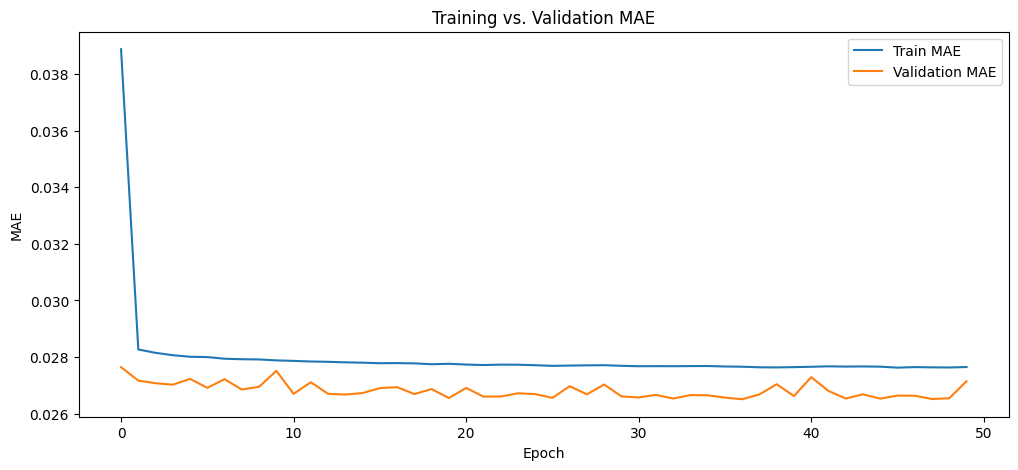

Neural Network model saved to ./model\int_rate_pred_nn.h5


6968/6968 ━━━━━━━━━━━━━━━━━━━━ 4s 580us/step

예측값이 추가된 X_test의 일부:
        term  emp_length  annual_inc       dti  delinq_2yrs  fico_avg  \
244471     0    1.000000    0.622853  0.054444            1  0.107817   
889356     0    1.000000    0.549033  0.078904            0  0.296496   
384041     0    0.909091    0.578659  0.071202            0  0.188679   
371797     0    0.272727    0.647167  0.037061            0  0.215633   
465084     1    0.090909    0.639955  0.056161            0  0.431267   

        inq_last_6mths  open_acc  pub_rec  revol_bal  ...  \
244471               0  0.144444        0   0.688294  ...   
889356               0  0.088889        0   0.588859  ...   
384041               0  0.088889        0   0.630135  ...   
371797               0  0.111111        1   0.616841  ...   
465084               1  0.111111        0   0.722793  ...   

        total_il_high_credit_limit  home_ownership_MORTGAGE  \
244471                    0.679227                    False   
8

In [25]:
import pandas as pd
import numpy as np
import os
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# 1. 데이터 로드 및 전처리
file_path = './data/sec_timeline_scaled.csv'
df = pd.read_csv(file_path)

# 비부도 데이터라 가정하고, 불필요한 칼럼 제거 (loan_status, grade, sub_grade)
df = df.drop(columns=['loan_status', 'grade', 'sub_grade'])

# 타겟 변수와 피처 분리 (타겟: int_rate)
target = 'int_rate'
features = [col for col in df.columns if col != target]

# 2. Train, Validation, Test 셋 분할 (예: 약 64% / 16% / 20%)
RANDOM_SEED = 42
train_valid, test = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)
train, valid = train_test_split(train_valid, test_size=0.2, random_state=RANDOM_SEED)

X_train = train[features]
y_train = train[target]
X_valid = valid[features]
y_valid = valid[target]
X_test  = test[features]
y_test  = test[target]

# ※ 데이터는 이미 스케일링된 상태로 가정하므로, 별도의 스케일링 코드는 포함하지 않습니다.

# 3. Neural Network Model 구성
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='linear')  # 회귀 문제이므로 선형 활성화 사용
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_absolute_error', metrics=['mae'])
model.summary()

# 4. 모델 학습
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_data=(X_valid, y_valid), 
                    verbose=1)

# 5. 테스트 셋에서 평가
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print("Test MAE: {:.4f}".format(test_mae))

# 학습 과정 시각화 (MAE)
plt.figure(figsize=(12,5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.title("Training vs. Validation MAE")
plt.legend()
plt.show()

# 6. 모델 저장
model_dir = "./model"
os.makedirs(model_dir, exist_ok=True)
save_path = os.path.join(model_dir, "int_rate_pred_nn.h5")
model.save(save_path)
print(f"Neural Network model saved to {save_path}")

# 7. 새로운 데이터에 대해 예측값 mapping 함수 정의 (데이터는 이미 스케일링된 상태)
def add_int_rate_prediction_nn(new_data, model_path, pred_column="int_rate_pred"):
    """
    new_data: 새로운 DataFrame (학습 시 사용했던 features와 동일해야 함)
    model_path: 저장된 NN 모델 파일 경로
    pred_column: 새로 추가할 예측값 칼럼 이름 (기본: "int_rate_pred")
    """
    # 저장된 모델 불러오기
    nn_model = load_model(model_path)
    # 예측 수행 (예측값은 (n,1) shape이므로 flatten)
    predictions = nn_model.predict(new_data).flatten()
    # 예측값을 새 칼럼으로 추가
    new_data[pred_column] = predictions
    return new_data

# 예시: X_test에 대해 NN 모델 예측값 매핑
X_test_df = X_test.copy()
X_test_with_pred = add_int_rate_prediction_nn(X_test_df, save_path)
print("\n예측값이 추가된 X_test의 일부:")
print(X_test_with_pred.head())
